In [5]:
%matplotlib inline
import numpy

In [6]:
import scipy

In [7]:
import matplotlib.pyplot as plt

In [8]:
import sklearn

In [9]:
import psutil

In [10]:
import pandas as pd

In [11]:
import IPython

In [12]:
import IPython.parallel

C:\Python36\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [13]:
import numpy as np
sample1 = np.random.rand(3,4)

In [14]:
data = pd.read_csv("C:\\Users\\lenovo\\Desktop\\KODLAR\\train.csv")

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [17]:
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [18]:
data.shape

(891, 12)

In [19]:
data.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ..., 
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [20]:
survived_column = data["Survived"]
print(type(survived_column))
survived_column.dtype

<class 'pandas.core.series.Series'>


dtype('int64')

In [21]:
data.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [22]:
np.mean(survived_column)

0.38383838383838381

In [23]:
target = survived_column.values
target.dtype
type(target)

numpy.ndarray

In [24]:
target[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [25]:
numerical_features = data[["Fare","Pclass","Age"]] 
numerical_features.head()

,Fare,Pclass,Age
0,7.2500,3,22.0
1,71.2833,1,38.0
2,7.9250,3,26.0
3,53.1000,1,35.0
4,8.0500,3,35.0


In [26]:
numerical_features.count()

Fare      891
Pclass    891
Age       714
dtype: int64

In [27]:
median_values = numerical_features.dropna().median()
median_values

Fare      15.7417
Pclass     2.0000
Age       28.0000
dtype: float64

In [28]:
inputed_features = numerical_features.fillna(median_values)
inputed_features.count()

Fare      891
Pclass    891
Age       891
dtype: int64

In [29]:
features_array = inputed_features.values
features_array.shape
features_array.dtype
features_array

array([[  7.25  ,   3.    ,  22.    ],
       [ 71.2833,   1.    ,  38.    ],
       [  7.925 ,   3.    ,  26.    ],
       ..., 
       [ 23.45  ,   3.    ,  28.    ],
       [ 30.    ,   1.    ,  26.    ],
       [  7.75  ,   3.    ,  32.    ]])

In [30]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_array, 
                                                target,test_size=0.2, 
                                                random_state=0)

In [31]:
Xtrain.shape

(712, 3)

In [32]:
Xtest.shape

(179, 3)

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(Xtrain,Ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
target_predicted = logreg.predict(Xtest)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(target_predicted,Ytest)

0.73184357541899436

In [36]:
logreg.score(Xtest,Ytest)


0.73184357541899436

In [37]:
feature_names = numerical_features.columns
feature_names

Index(['Fare', 'Pclass', 'Age'], dtype='object')

In [38]:
feature_names.values

array(['Fare', 'Pclass', 'Age'], dtype=object)

In [39]:
logreg.coef_

array([[ 0.0043996 , -0.80916725, -0.03348064]])

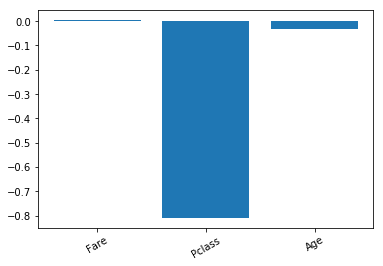

In [40]:
x = np.arange(len(feature_names))
plt.bar(x, logreg.coef_.ravel())
plt.xticks(x ,feature_names,
           rotation=30)
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest,target_predicted)
cm

array([[98, 12],
       [36, 33]], dtype=int64)

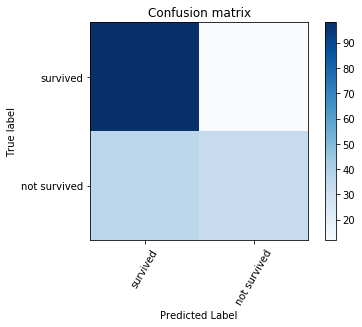

In [42]:
def plot_confusion(cm, target_names=["survived","not survived"],
                  title="Confusion matrix"):
    plt.imshow(cm, interpolation="nearest",cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks,  target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    plt.tight_layout
plot_confusion(cm)

In [43]:
plt.show()

In [44]:
sum = cm.sum(axis=1).reshape(-1,1)

In [45]:
cm_normalized = cm.astype(np.float64)/cm.sum(axis=1).reshape(-1,1)
cm_normalized

array([[ 0.89090909,  0.10909091],
       [ 0.52173913,  0.47826087]])

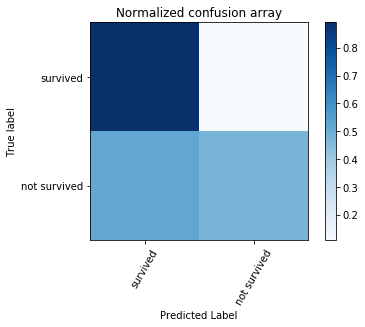

In [46]:
plot_confusion(cm_normalized, title="Normalized confusion array")
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, target_predicted,
                            target_names=["not survived","survived"]))

              precision    recall  f1-score   support

not survived       0.73      0.89      0.80       110
    survived       0.73      0.48      0.58        69

 avg / total       0.73      0.73      0.72       179



In [48]:
target_predicted_proba = logreg.predict_proba(Xtest)
target_predicted_proba[:5]

array([[ 0.75263264,  0.24736736],
       [ 0.75824771,  0.24175229],
       [ 0.58542437,  0.41457563],
       [ 0.25224882,  0.74775118],
       [ 0.75817844,  0.24182156]])

In [49]:
target_predicted_proba.shape

(179, 2)

In [50]:
target_predicted_proba

array([[ 0.75263264,  0.24736736],
       [ 0.75824771,  0.24175229],
       [ 0.58542437,  0.41457563],
       [ 0.25224882,  0.74775118],
       [ 0.75817844,  0.24182156],
       [ 0.3598054 ,  0.6401946 ],
       [ 0.32840071,  0.67159929],
       [ 0.25598792,  0.74401208],
       [ 0.28025941,  0.71974059],
       [ 0.75850633,  0.24149367],
       [ 0.74550808,  0.25449192],
       [ 0.67078091,  0.32921909],
       [ 0.75808637,  0.24191363],
       [ 0.38901921,  0.61098079],
       [ 0.28053547,  0.71946453],
       [ 0.66218111,  0.33781889],
       [ 0.7247853 ,  0.2752147 ],
       [ 0.47605211,  0.52394789],
       [ 0.79822885,  0.20177115],
       [ 0.55365444,  0.44634556],
       [ 0.49543623,  0.50456377],
       [ 0.21254297,  0.78745703],
       [ 0.75809646,  0.24190354],
       [ 0.35929884,  0.64070116],
       [ 0.71751098,  0.28248902],
       [ 0.34705722,  0.65294278],
       [ 0.78168241,  0.21831759],
       [ 0.71936878,  0.28063122],
       [ 0.53800522,

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(Ytest, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(Ytest, target_predicted_proba[:,1])
    
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label="Roc curve  (area = %.3f)" % roc_auc)
    plt.plot([0,1], [0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate or (1 - Specifity)")
    plt.ylabel("True Positive Rate or (Sensitivity)")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc=0)

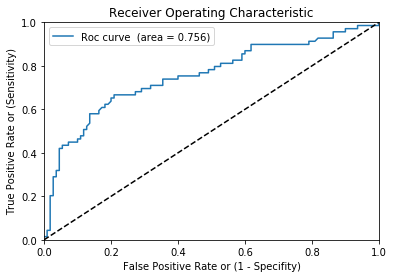

In [52]:
plot_roc_curve(Ytest, target_predicted_proba)
plt.show()

In [53]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_array, 
                                                target,test_size=0.2, 
                                                random_state=0)

logreg.fit(Xtrain, Ytrain).score(Xtest, Ytest)

0.73184357541899436

In [54]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_array, 
                                                target,test_size=0.2, 
                                                random_state=0)

logreg.fit(Xtrain, Ytrain).score(Xtest, Ytest)

0.73184357541899436

In [80]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, features_array, target, cv=5)
scores

array([ 0.60335196,  0.70949721,  0.6741573 ,  0.66853933,  0.68361582])

In [56]:
scores.min(), scores.mean(), scores.max()

(0.63128491620111726, 0.69370682962933028, 0.7303370786516854)

In [57]:
%%time
scores = cross_val_score(logreg, features_array, target, cv=10,
                        scoring="f1")
print(scores.mean(),scores.max(),scores.min())

0.510599033723 0.607142857143 0.37037037037
Wall time: 27 ms


In [58]:
data[["Sex","Embarked"]].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [59]:
pd.get_dummies(data["Sex"], prefix="Sex").head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [60]:
pd.get_dummies(data["Embarked"], prefix="Embarked").head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [61]:
factors, labels = pd.factorize(data["Embarked"])
factors[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [62]:
labels

Index(['S', 'C', 'Q'], dtype='object')

In [63]:
rich_features = pd.concat([data[["Fare","Pclass","Age"]],
                          pd.get_dummies(data["Sex"], prefix="Sex"),
                          pd.get_dummies(data["Embarked"],prefix="Embarked")],
                         axis=1)
rich_features.head()

,Fare,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,3,22.0,0,1,0,0,1
1,71.2833,1,38.0,1,0,1,0,0
2,7.9250,3,26.0,1,0,0,0,1
3,53.1000,1,35.0,1,0,0,0,1
4,8.0500,3,35.0,0,1,0,0,1


In [64]:
rich_features = rich_features.drop("Sex_female", axis=1)
rich_features.head()

,Fare,Pclass,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,3,22.0,1,0,0,1
1,71.2833,1,38.0,0,1,0,0
2,7.9250,3,26.0,0,0,0,1
3,53.1000,1,35.0,0,0,0,1
4,8.0500,3,35.0,1,0,0,1


In [65]:
rich_features.count()

Fare          891
Pclass        891
Age           714
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [66]:
rich_features = rich_features.fillna(rich_features.median())
rich_features.head()

,Fare,Pclass,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,3,22.0,1,0,0,1
1,71.2833,1,38.0,0,1,0,0
2,7.9250,3,26.0,0,0,0,1
3,53.1000,1,35.0,0,0,0,1
4,8.0500,3,35.0,1,0,0,1


In [67]:
rich_features.count()

Fare          891
Pclass        891
Age           891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [99]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1).fit(rich_features,target)
scores = cross_val_score(logreg, rich_features, target, cv=5, scoring="accuracy")
print("Logistic Regression CV Scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Logistic Regression CV Scores:
min: 0.775, mean: 0.791, max: 0.810
Wall time: 25 ms


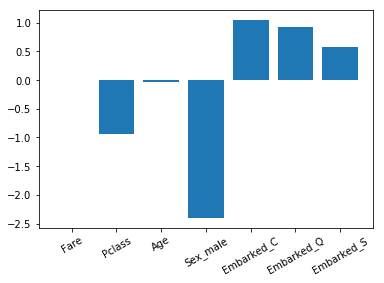

In [105]:
logreg_new = LogisticRegression(C=1).fit(rich_features, target)

x = np.arange(len(rich_features.columns.values))
plt.bar(x, logreg_new.coef_.ravel())
plt.xticks(x ,rich_features.columns.values,
           rotation=30)
plt.show()

# ENSEMBLE OF RANDOMIZED TREES

In [116]:
%%time

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=4)
scores = cross_val_score(rf, rich_features, target, cv=5, n_jobs=4,
                        scoring="accuracy")
print("Random Forest CV scores")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(scores.min(),
                                                     scores.mean(),
                                                     scores.max()))


Random Forest CV scores
min: 0.771, mean: 0.807, max: 0.843
Wall time: 3.94 s


In [115]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,
                               subsample=.8, max_features=.5)

scores = cross_val_score(gb, rich_features, target, cv=5, n_jobs=4,
                        scoring="accuracy")
print("Gradient Boosting Trees CV Scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(scores.min(), 
                                                      scores.mean(), 
                                                     scores.max()))


Gradient Boosting Trees CV Scores:
min: 0.781, mean: 0.816, max: 0.854
Wall time: 3.23 s


In [121]:
features = pd.concat([data.get(["Fare", "Age"]), 
                     pd.get_dummies(data.Sex, prefix="Sex"),
                     pd.get_dummies(data.Pclass, prefix="Pclass"),
                     pd.get_dummies(data.Embarked, prefix="Embarked")],
                    axis=1)
features = features.drop("Sex_male", axis=1)
features = features.fillna(features.dropna().median())
features.head()

logreg = LogisticRegression(C=1)
scores = cross_val_score(logreg, features, target, cv=5, 
                        scoring="accuracy")
print("Logistic Regression CV Scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(scores.min(), 
                                                       scores.mean(),
                                                      scores.max()))

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=.1,
                               subsample=.8, max_features=.5)
scores = cross_val_score(gb, features, target, cv=5, n_jobs=4,
                        scoring="accuracy")
print("Gradient Boosting Classifier CV Scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(scores.min(), 
                                                       scores.mean(),
                                                      scores.max()))

Logistic Regression CV Scores:
min: 0.770, mean: 0.789, max: 0.816
Gradient Boosting Classifier CV Scores:
min: 0.803, mean: 0.819, max: 0.847


In [170]:
gb_new = GradientBoostingClassifier(n_estimators=100, learning_rate=.1,
                                   subsample=.8, max_features=.5)
gb_new.fit(features, target)
gb_new.feature_importances_

array([ 0.3455948 ,  0.31950173,  0.16083357,  0.04062366,  0.01703523,
        0.05472427,  0.02339285,  0.02177609,  0.0165178 ])

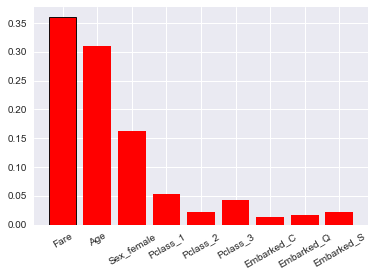

In [176]:
import seaborn; seaborn.set()
gb_new = GradientBoostingClassifier(n_estimators=100, learning_rate=.1,
                                   subsample=.8, max_features=.5)
gb_new.fit(features, target)
features_names = features.columns.values
x = np.arange(len(features_names))
plt.bar(x, gb_new.feature_importances_, color="r",edgecolor="k",lw=.9)
plt.xticks(x, features_names,rotation=30)
plt.show()

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5).fit(features, target)
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1910916405, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=500593739, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

# AUTOMATED PARAMETER TUNING

In [193]:
%%time

from sklearn.grid_search import RandomizedSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    "learning_rate":[.05, .1, .5,],
    "max_features":[.5,  1],
    "max_depth":[3,4,5]
}
gs = RandomizedSearchCV(gb, params,n_iter=10, cv=5, scoring="roc_auc", n_jobs=1)
gs.fit(rich_features, target)
gs.grid_scores_

Wall time: 4.96 s


In [194]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.87351, std: 0.02519, params: {'max_features': 0.5, 'max_depth': 4, 'learning_rate': 0.1},
 mean: 0.87014, std: 0.02699, params: {'max_features': 0.5, 'max_depth': 3, 'learning_rate': 0.05},
 mean: 0.86994, std: 0.02577, params: {'max_features': 1, 'max_depth': 4, 'learning_rate': 0.1},
 mean: 0.86527, std: 0.02514, params: {'max_features': 1, 'max_depth': 5, 'learning_rate': 0.05},
 mean: 0.86412, std: 0.01624, params: {'max_features': 0.5, 'max_depth': 3, 'learning_rate': 0.5},
 mean: 0.86230, std: 0.01978, params: {'max_features': 1, 'max_depth': 3, 'learning_rate': 0.05},
 mean: 0.85588, std: 0.02899, params: {'max_features': 1, 'max_depth': 3, 'learning_rate': 0.5},
 mean: 0.85522, std: 0.02047, params: {'max_features': 1, 'max_depth': 4, 'learning_rate': 0.5},
 mean: 0.85109, std: 0.01624, params: {'max_features': 1, 'max_depth': 5, 'learning_rate': 0.5},
 mean: 0.84914, std: 0.02411, params: {'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.5}]

In [196]:
gs.best_score_

0.8735101925551317

In [195]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.5}

In [191]:
gs.predict(rich_features)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1,

# AVOIDING DATA SNOOPING WITH PIPELINES

In [246]:
features = pd.concat([data.get(["Fare", "Age"]), 
                     pd.get_dummies(data.Sex, prefix="Sex"),
                     pd.get_dummies(data.Pclass, prefix="Pclass"),
                     pd.get_dummies(data.Embarked, prefix="Embarked")],
                    axis=1)
features = features.drop("Sex_male", axis=1)
#features = features.fillna(features.dropna().median())
features.head()

features.fillna(-1,inplace=True)

In [226]:
from sklearn.cross_validation import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(features.values, target, 
                                                  random_state=0)

In [227]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median", missing_values= -1)
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values=-1, strategy='median', verbose=0)

In [228]:
imputer.statistics_

array([ 14.5,  29. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ])

In [229]:
features.columns.values

array(['Fare', 'Age', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [230]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [231]:
np.any(X_train ==  -1)

True

In [224]:
np.any(X_train_imputed == -1)

False

In [237]:
np.any(X_test == -1)

True

In [238]:
np.any(X_test_imputed == -1)

False

# Pipeline

In [244]:
from sklearn.pipeline import Pipeline

imputer = Imputer(strategy="median", missing_values= -1)

classifier = GradientBoostingClassifier(n_estimators=100, 
                                       learning_rate=.1,
                                       subsample= .8, max_features=.5,
                                       random_state=0)

pipeline = Pipeline([
    ("imp" , imputer),
    ("clf", classifier)
])

scores = cross_val_score(pipeline, features, target, cv=5, n_jobs=4,
                        scoring="accuracy")

print(scores.min(), scores.mean(), scores.max())

0.798882681564 0.820505272207 0.848314606742


In [247]:
%%time

params = {
    "imp__strategy": ["mean", "median"],
    "clf__max_features": [.5, 1],
    "clf__max_depth": [3,4,5]
}
gs = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=4)
gs.fit(X_train, Y_train)

Wall time: 3.46 s


In [248]:
sorted(gs.grid_scores_, key= lambda x: x.mean_validation_score, reverse=True)

[mean: 0.87057, std: 0.02432, params: {'clf__max_depth': 3, 'clf__max_features': 0.5, 'imp__strategy': 'median'},
 mean: 0.86711, std: 0.02780, params: {'clf__max_depth': 4, 'clf__max_features': 0.5, 'imp__strategy': 'median'},
 mean: 0.86658, std: 0.02546, params: {'clf__max_depth': 3, 'clf__max_features': 0.5, 'imp__strategy': 'mean'},
 mean: 0.86259, std: 0.02315, params: {'clf__max_depth': 4, 'clf__max_features': 0.5, 'imp__strategy': 'mean'},
 mean: 0.86173, std: 0.02264, params: {'clf__max_depth': 5, 'clf__max_features': 0.5, 'imp__strategy': 'mean'},
 mean: 0.86063, std: 0.03116, params: {'clf__max_depth': 5, 'clf__max_features': 0.5, 'imp__strategy': 'median'},
 mean: 0.85915, std: 0.02524, params: {'clf__max_depth': 3, 'clf__max_features': 1, 'imp__strategy': 'median'},
 mean: 0.85886, std: 0.02511, params: {'clf__max_depth': 4, 'clf__max_features': 1, 'imp__strategy': 'mean'},
 mean: 0.85656, std: 0.02388, params: {'clf__max_depth': 3, 'clf__max_features': 1, 'imp__strategy':

In [249]:
gs.best_score_

0.8705657468860976

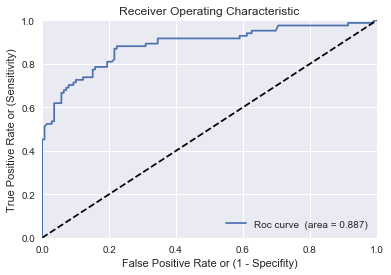

In [250]:
plot_roc_curve(Y_test, gs.predict_proba(X_test))

In [251]:
gs.best_params_

{'clf__max_depth': 3, 'clf__max_features': 0.5, 'imp__strategy': 'median'}

In [266]:
np.random.randint(2)

0